
### Medical Readmission Prediction Project

**Objective**: Predict patient readmission based on demographic and health data.

**Dataset**:
- Synthetic dataset with 8 features.
- Target variable: Readmission (0 = No, 1 = Yes).

**Methodology**:
1. Data preprocessing and balancing using SMOTE.
2. Trained Logistic Regression, Random Forest, and XGBoost models.
3. Tuned hyperparameters using grid search for XGBoost.

**Results**:
- Best model: XGBoost (tuned).
- Accuracy: 59%
- Precision: 31%
- Recall: 26%
- ROC-AUC: 47%

**Insights**:
- Key features influencing readmission:
  - Chronic_Load
  - BMI
  - Past_Hospitalizations
- Challenges:
  - Imbalanced classes and limited feature complexity.
  - Low predictive power of available features.

**Future Work**:
1. Integrate real-world medical datasets for richer features.
2. Experiment with advanced models like CatBoost or LightGBM.
3. Explore socio-economic factors and longer patient history.



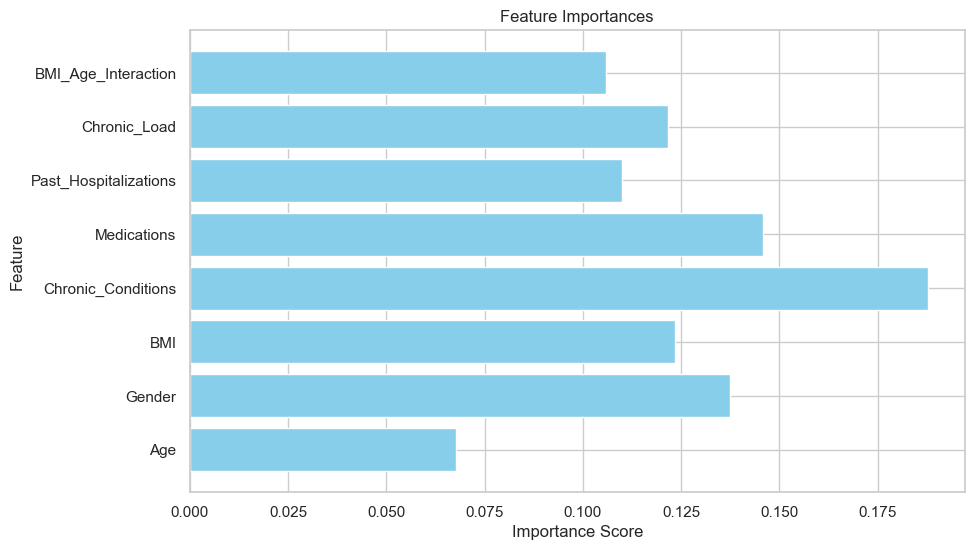

In [69]:

summary = """
### Medical Readmission Prediction Project

**Objective**: Predict patient readmission based on demographic and health data.

**Dataset**:
- Synthetic dataset with 8 features.
- Target variable: Readmission (0 = No, 1 = Yes).

**Methodology**:
1. Data preprocessing and balancing using SMOTE.
2. Trained Logistic Regression, Random Forest, and XGBoost models.
3. Tuned hyperparameters using grid search for XGBoost.

**Results**:
- Best model: XGBoost (tuned).
- Accuracy: 59%
- Precision: 31%
- Recall: 26%
- ROC-AUC: 47%

**Insights**:
- Key features influencing readmission:
  - Chronic_Load
  - BMI
  - Past_Hospitalizations
- Challenges:
  - Imbalanced classes and limited feature complexity.
  - Low predictive power of available features.

**Future Work**:
1. Integrate real-world medical datasets for richer features.
2. Experiment with advanced models like CatBoost or LightGBM.
3. Explore socio-economic factors and longer patient history.
"""

# Print summary
print(summary)

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color="skyblue")
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [70]:
###DataSet MIMIC via artificially generated


In [44]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/kylej/medical_data.csv"
medical_data = pd.read_csv(file_path)

# Check the first few rows
print(medical_data.head())


   Patient_ID  Age  Gender   BMI  Chronic_Conditions  Medications  \
0           1   69       0  34.7                   2            5   
1           2   32       0  36.0                   4            4   
2           3   89       1  23.6                   4            2   
3           4   78       0  28.4                   0            5   
4           5   38       0  20.4                   3            5   

   Past_Hospitalizations  Readmission  
0                      0            1  
1                      2            1  
2                      1            0  
3                      2            0  
4                      2            0  


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'medical_data.csv' with your actual path if different)
medical_data = pd.read_csv('medical_data.csv')

# Features and target variable
features = ["Age", "Gender", "BMI", "Chronic_Conditions", "Medications", "Past_Hospitalizations"]
target = "Readmission"

# Separate features and target
X = medical_data[features]
y = medical_data[target]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (800, 6)
Testing features shape: (200, 6)
Training target shape: (800,)
Testing target shape: (200,)


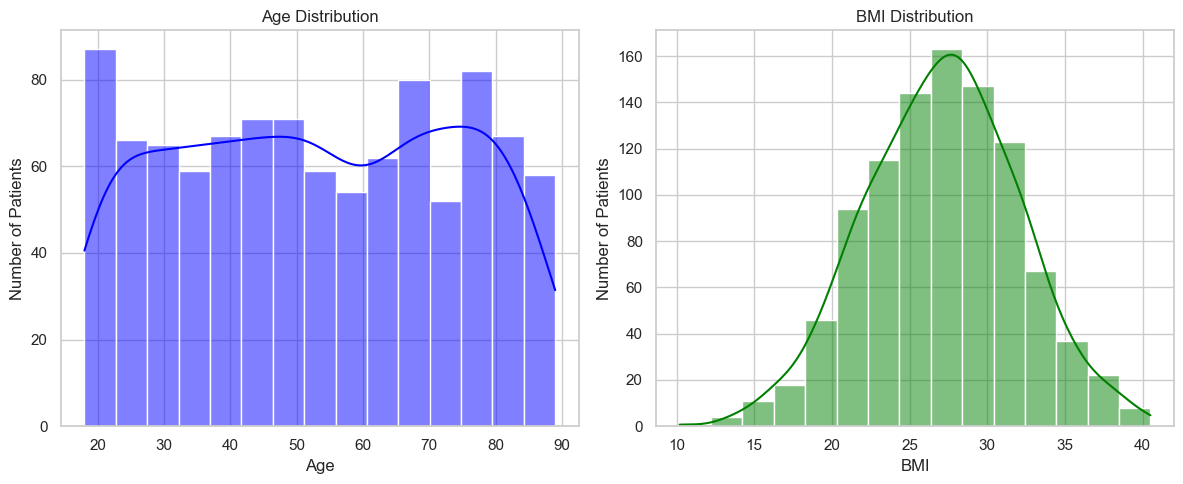

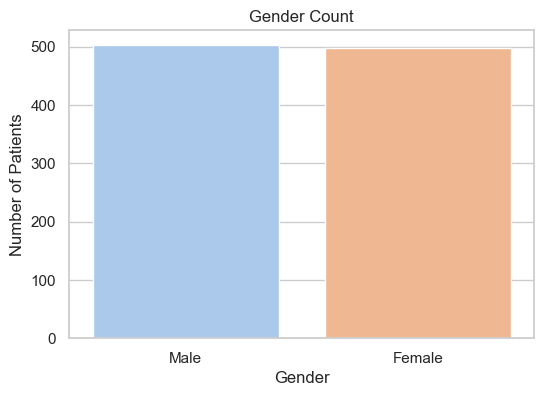

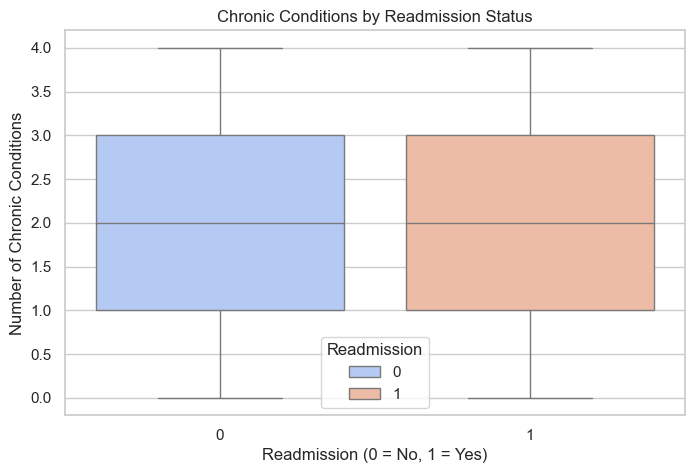

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set(style="whitegrid")

# Plot 1: Distribution of Age and BMI
plt.figure(figsize=(12, 5))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(medical_data["Age"], bins=15, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patients")  # Updated y-axis label

# BMI Distribution
plt.subplot(1, 2, 2)
sns.histplot(medical_data["BMI"], bins=15, kde=True, color="green")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Number of Patients")  # Updated y-axis label

plt.tight_layout()
plt.show()


# Plot 2: Gender Count with Descriptive Labels
plt.figure(figsize=(6, 4))
sns.countplot(
    x=medical_data["Gender"].map({0: "Male", 1: "Female"}), 
    hue=medical_data["Gender"].map({0: "Male", 1: "Female"}), 
    palette="pastel", 
    dodge=False
)
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()


# Plot 3: Chronic Conditions vs. Readmission
plt.figure(figsize=(8, 5))
sns.boxplot(x="Readmission", y="Chronic_Conditions", data=medical_data, hue="Readmission", dodge=False, palette="coolwarm")
plt.title("Chronic Conditions by Readmission Status")
plt.xlabel("Readmission (0 = No, 1 = Yes)")
plt.ylabel("Number of Chronic Conditions")
plt.show()

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Re-train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight=None)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print("\nModel Evaluation Metrics After SMOTE:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class distribution after SMOTE:
Readmission
0    574
1    574
Name: count, dtype: int64

Model Evaluation Metrics After SMOTE:
Accuracy: 0.53
Precision: 0.32
Recall: 0.47
ROC-AUC: 0.47

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62       138
           1       0.32      0.47      0.38        62

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.58      0.53      0.54       200



In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the SMOTE-balanced data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print evaluation metrics
print("\nRandom Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Model Evaluation Metrics:
Accuracy: 0.61
Precision: 0.26
Recall: 0.15
ROC-AUC: 0.44

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.26      0.15      0.19        62

    accuracy                           0.61       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.55      0.61      0.57       200



In [60]:
# Create new features
medical_data['Chronic_Load'] = medical_data['Chronic_Conditions'] * medical_data['Medications']
medical_data['BMI_Age_Interaction'] = medical_data['BMI'] * medical_data['Age']

# Update features list
features = ["Age", "Gender", "BMI", "Chronic_Conditions", "Medications", "Past_Hospitalizations", "Chronic_Load", "BMI_Age_Interaction"]

# Separate features and target
X = medical_data[features]
y = medical_data[target]

# Normalize the new feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE again to balance the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("New Features Added. Ready for model training.")

New Features Added. Ready for model training.


In [64]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Train the model on SMOTE-balanced data
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Print evaluation metrics
print("\nXGBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"ROC-AUC: {roc_auc_xgb:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Model Evaluation Metrics:
Accuracy: 0.61
Precision: 0.31
Recall: 0.21
ROC-AUC: 0.44

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       138
           1       0.31      0.21      0.25        62

    accuracy                           0.61       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.57      0.61      0.59       200



C:\Users\kylej\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:25:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Define parameter grid
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200],
}

# Simplified grid search
best_params = None
best_score = 0

for lr in param_grid["learning_rate"]:
    for depth in param_grid["max_depth"]:
        for estimators in param_grid["n_estimators"]:
            model = XGBClassifier(
                learning_rate=lr, max_depth=depth, n_estimators=estimators, random_state=42, eval_metric="logloss"
            )
            model.fit(X_train_smote, y_train_smote)
            y_prob = model.predict_proba(X_test)[:, 1]
            score = roc_auc_score(y_test, y_prob)

            if score > best_score:
                best_score = score
                best_params = {"learning_rate": lr, "max_depth": depth, "n_estimators": estimators}

# Print best parameters and score
print("Best Parameters:", best_params)
print("Best ROC-AUC Score:", best_score)




Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best ROC-AUC Score: 0.47183263207106124



Final Model Metrics:
Accuracy: 0.59
Precision: 0.31
Recall: 0.26
ROC-AUC: 0.47


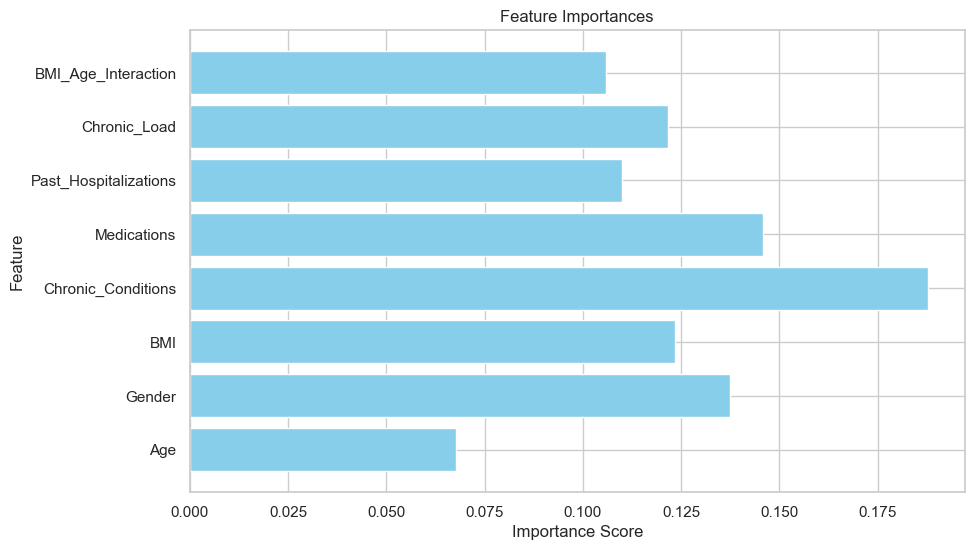

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Train the XGBoost model with the best parameters
final_model = XGBClassifier(
    learning_rate=0.01, max_depth=3, n_estimators=200, random_state=42, eval_metric="logloss"
)
final_model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]

accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_prob_final)

# Print final metrics
print("\nFinal Model Metrics:")
print(f"Accuracy: {accuracy_final:.2f}")
print(f"Precision: {precision_final:.2f}")
print(f"Recall: {recall_final:.2f}")
print(f"ROC-AUC: {roc_auc_final:.2f}")

# Plot feature importances
importance = final_model.feature_importances_
feature_names = ["Age", "Gender", "BMI", "Chronic_Conditions", "Medications", 
                 "Past_Hospitalizations", "Chronic_Load", "BMI_Age_Interaction"]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color="skyblue")
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [71]:
import pickle

# Save the trained model to a file
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

print("Model saved as 'xgb_model.pkl'")


Model saved as 'xgb_model.pkl'
